# Assignment 1: Problem A
    In this problem, you will implement Fischer’s Linear Discriminant from scratch as learnt
    in class, i.e. given the higher dimensional data reduce the data to one dimension while
    maximizing difference of means and minimizing sum of variances of the clusters.
    Finally,calculate the intersection point of both the normal distributions corresponding to the collapsed
    clusters and find the discriminant vector in 1-D and 3-D.

red=positive
blue=negative

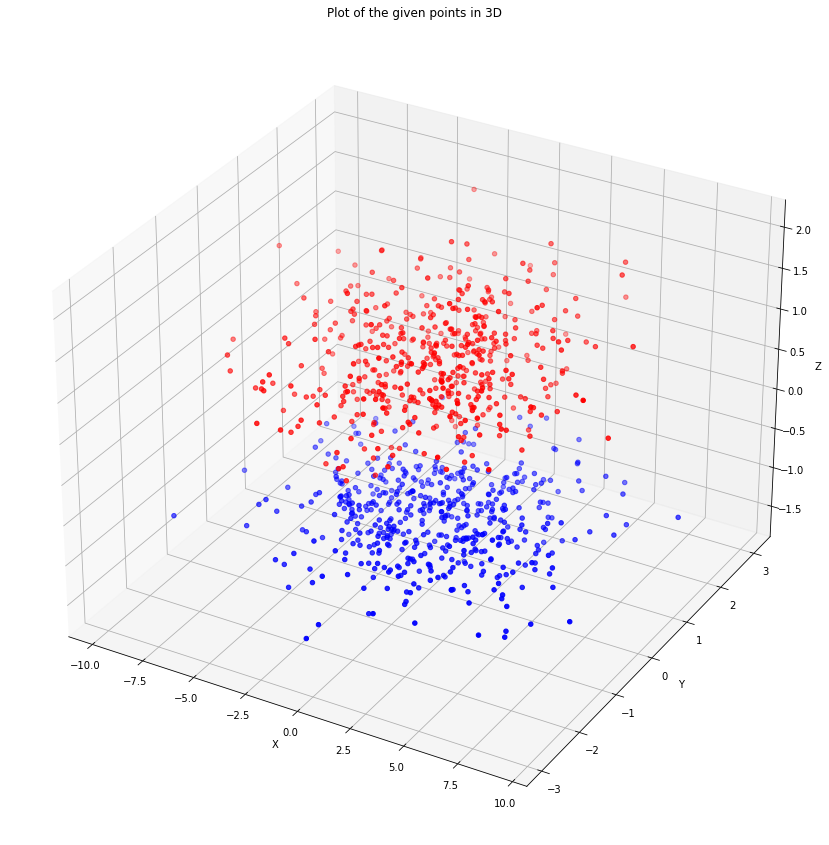

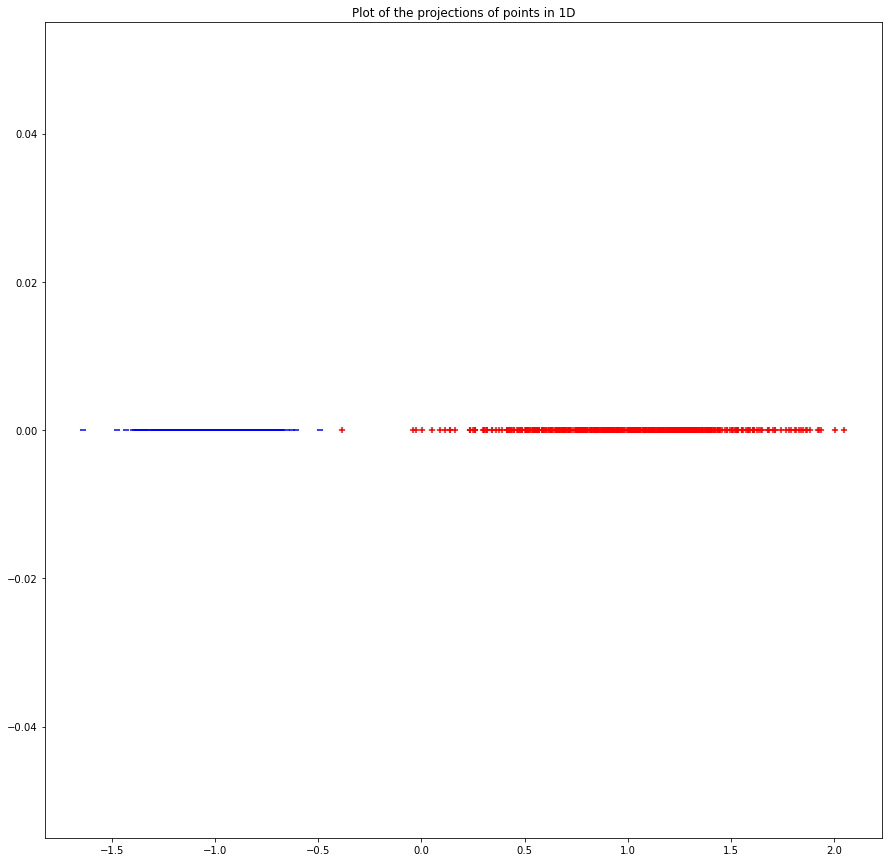

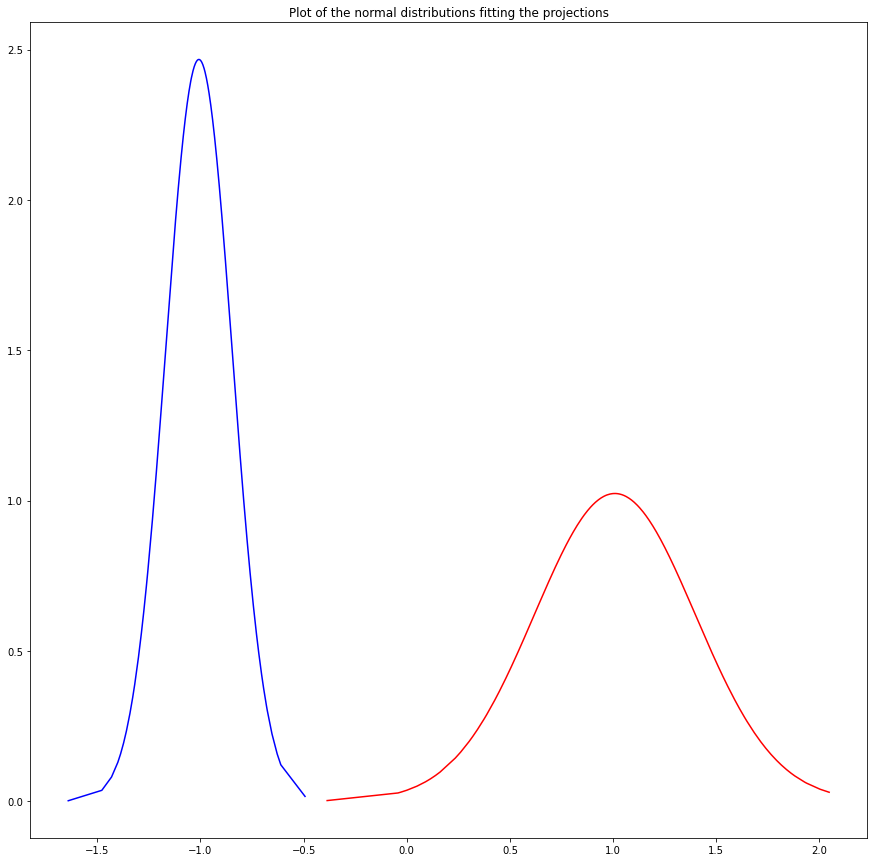

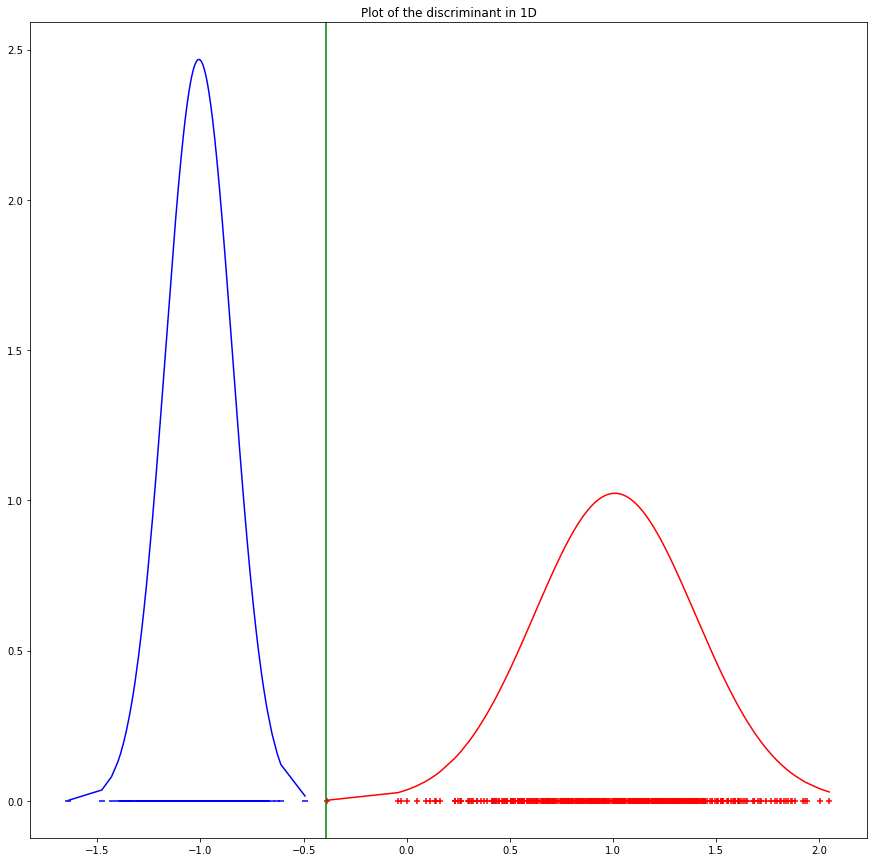

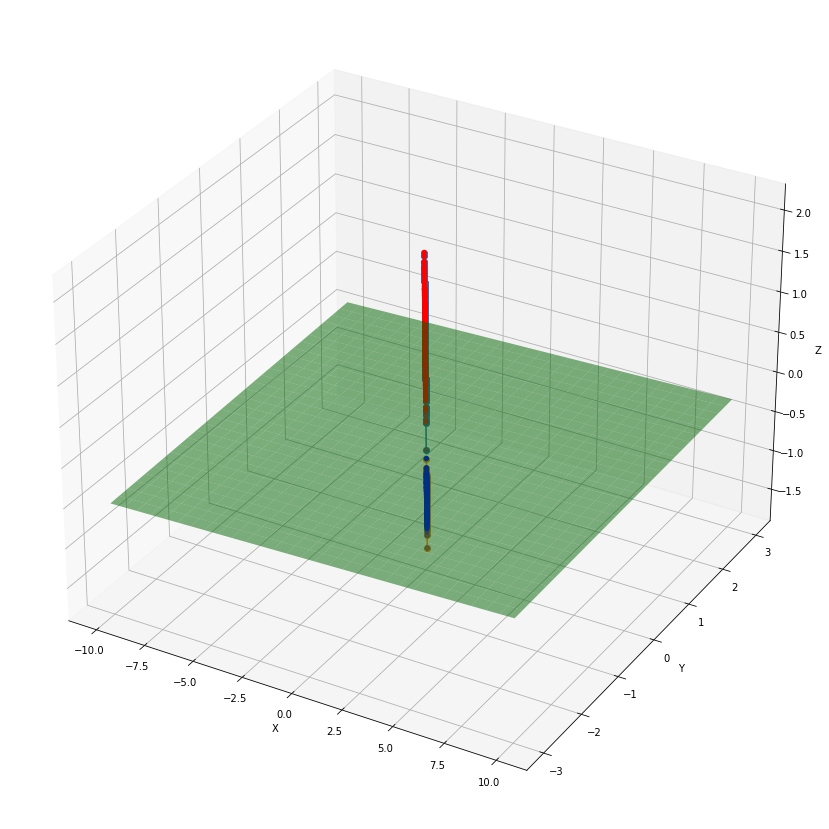

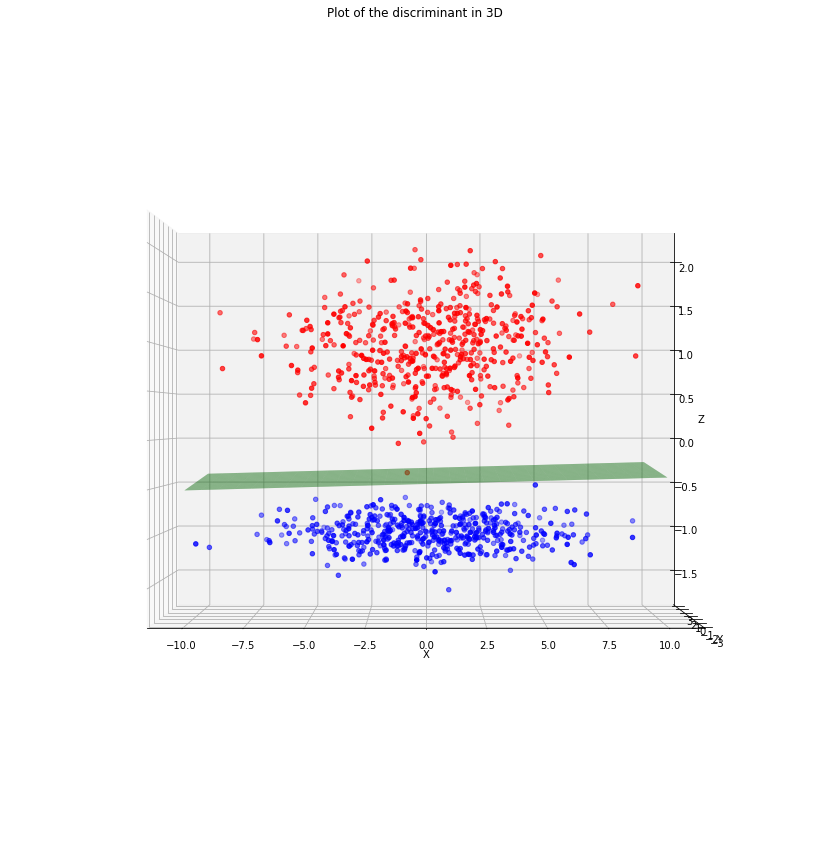

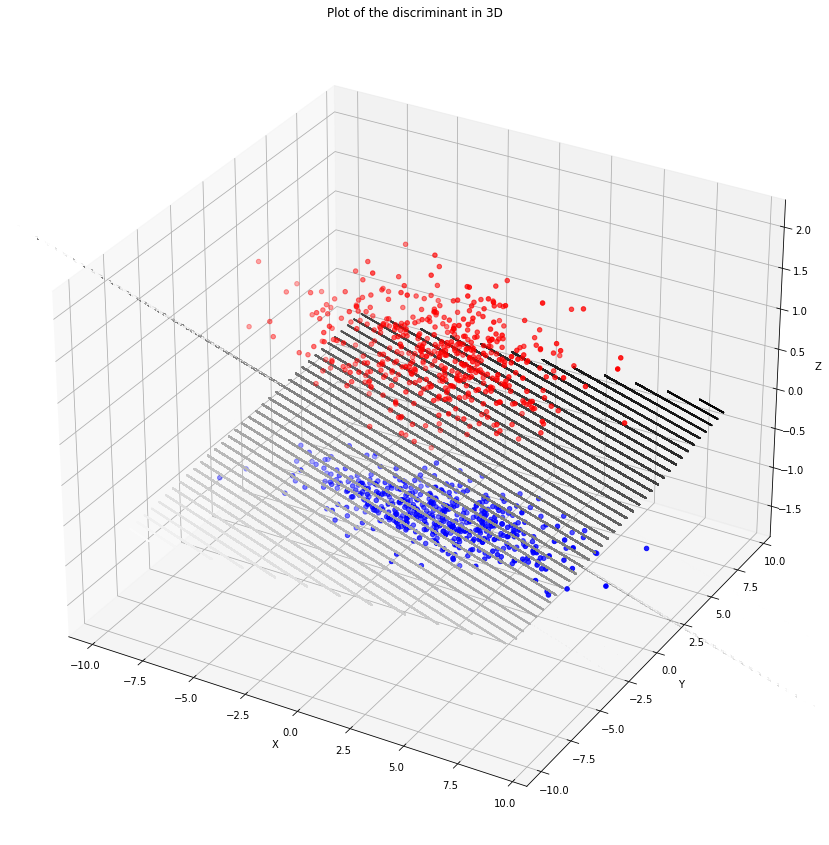

[-0.00655686 -0.01823739  0.99981218]
-0.3893028020993765


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#separating the dataset into 2 classes based on target attribute
def process_data(fname):
    data = pd.read_csv(fname,header=None,sep=',')
    positive,negative = [i for _, i in data.groupby(data[len(data.columns)-1]==0)]
    pos = np.array(positive.drop(len(data.columns)-1,1))
    neg = np.array(negative.drop(len(data.columns)-1,1))
    return pos,neg
#finding the point of intersection of 2 gaussian distributions
def intersection(m1,v1,m2,v2):
    a=((1/v2)-(1/v1))
    b=2*((m1/v1)-(m2/v2))
    c=((m2**2)/v2)-((m1**2)/v1)-np.log(v1/v2)
    det=np.sqrt((b**2)-(4*a*c))
    x=(det-b)/(2*a)
    return x
#finding mean
def get_means(nparray):
    m=np.mean(nparray,axis=0)
    return m
#finding variance
def var(X):
    m = get_means(X) 
    return (np.dot((X-m).T, (X-m)) / X.shape[0])
#to find the gaussian distribution given x,mean,variance
def gaussian_distr(X,m,v):
    y = (1/np.sqrt(2*np.pi*v)) * np.exp(-((X-m)**2)/(2*v))
    return y
#the fischer algorithm
def fischer(fname):
    C1,C2=process_data(fname)
    M1=get_means(C1)
    M2=get_means(C2)
    Sw=var(C1)+var(C2)
    W=np.dot(np.linalg.inv(Sw), (M1-M2).T)
    W=(1/np.sqrt(W@W))*W
    c1 = np.sort(np.dot(C1, W.T))
    c2 = np.sort(np.dot(C2, W.T))
    m1=get_means(c1)
    v1=var(c1)
    m2=get_means(c2)
    v2=var(c2)
    g1 = gaussian_distr(c1,m1,v1)
    g2 = gaussian_distr(c2,m2,v2)
    x=intersection(m1,v1,m2,v2)
    plot_points(C1,C2)
    plot_trans(c1,c2)
    plot_gaussian(c1,c2,g1,g2)
    res_trans(c1,c2,g1,g2,x)
    discr_3d(c1,c2,W,C1,C2,x)
    res_plot(C1,C2,x,W)
    res_plot1(C1,C2,x,W)
    
    print(W)
    print(x)

def plot_gaussian(c1,c2,g1,g2):
    plt.figure(figsize = (15,15))
    plt.plot(c1,g1, color='red')
    plt.plot(c2,g2, color='blue')
    plt.title('Plot of the normal distributions fitting the projections')
    plt.show()
    
#plot of the given points
def plot_points(x,y):
    fig = plt.figure(figsize = (15,15))
    ax = plt.axes(projection ="3d")
    ax.scatter(x[:,0],x[:,1],x[:,2],color='red')
    ax.scatter(y[:,0],y[:,1],y[:,2],color='blue')
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('Z')
    plt.title('Plot of the given points in 3D')
    plt.show()
#plot after projecting the points on a unit vector such that difference between mean of the projections is maximised
#and the sum of variances of the projections is minimised
def plot_trans(c1,c2):
    plt.figure(figsize = (15,15))
    plt.scatter(c1,np.zeros(len(c1)),color='red',marker='+')
    plt.scatter(c2,np.zeros(len(c2)),color='blue',marker='_')
    plt.title('Plot of the projections of points in 1D')
    plt.show()
#plotting the normal distribution that fits the projected points and a discriminating line passing through the
#point of intersection of the normal distributions
def res_trans(c1,c2,g1,g2,x1):
    plt.figure(figsize = (15,15))
    plt.scatter(c1,np.zeros(len(c1)),color='red',marker='+')
    plt.scatter(c2,np.zeros(len(c2)),color='blue',marker='_')
    plt.plot(c1,g1, color='red')
    plt.plot(c2,g2, color='blue')
    plt.axvline(x=x1,color='green')
    plt.title('Plot of the discriminant in 1D')
    plt.show()  
#getting the discriminating plane in 3-D
def f(x, y,w,xint):
    return (xint-(w[0]*x)-(w[1]*y))/w[2]
#plotting the points and the discriminant in 3D
def res_plot(x,y,xint,w):
    fig = plt.figure(figsize = (15,15))
    ax = plt.axes(projection ="3d")
    x1 = np.linspace(-10, 10, 30)
    y1 = np.linspace(-3, 3, 30)
    X, Y = np.meshgrid(x1, y1)
    Z = f(X, Y,w,xint)
    ax.plot_surface(X,Y,Z,alpha = 0.5, color = 'green') 
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('Z')
    ax.scatter(x[:,0],x[:,1],x[:,2],color='red')
    ax.scatter(y[:,0],y[:,1],y[:,2],color='blue')
    ax.view_init(0,270) 
    plt.title('Plot of the discriminant in 3D')
    plt.show()
def res_plot1(x,y,xint,w):
    fig = plt.figure(figsize = (15,15))
    ax = plt.axes(projection ="3d")
    x1 = np.linspace(-10, 10, 30)
    y1 = np.linspace(-3, 3, 30)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y,w,xint)
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.scatter(x[:,0],x[:,1],x[:,2],color='red')
    ax.scatter(y[:,0],y[:,1],y[:,2],color='blue')
    plt.title('Plot of the discriminant in 3D')
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('Z')
    plt.show()
def discr_3d(c1,c2,w,x,y,xint):
    fig = plt.figure(figsize = (15,15))
    ax = plt.axes(projection ="3d")
    x11 = np.linspace(-10, 10, 30)
    y11 = np.linspace(-3, 3, 30)
    X, Y = np.meshgrid(x11, y11)
    Z = f(X, Y,w,xint)
    cosa=w[0]/np.sqrt(w@w)
    cosb=w[1]/np.sqrt(w@w)
    cosc=w[2]/np.sqrt(w@w)
    x1=c1*cosa
    x2=c2*cosa
    y1=c1*cosb
    y2=c2*cosb
    z1=c1*cosc
    z2=c2*cosc
    ax = plt.axes(projection ="3d")
    #ax.view_init(0,270)
    ax.scatter(x1, y1, z1, zdir='z', s=20, c='red', depthshade=True)
    ax.scatter(x2, y2, z2, zdir='z', s=20, c='blue', depthshade=True)
    ax.plot_surface(X,Y,Z,alpha = 0.5, color = 'green') 
    ax.set_xlabel('X') 
    ax.set_zlabel('Z')
    ax.set_ylabel('Y') 
    plt.plot(x1,y1,z1,'-o')
    plt.plot(x2,y2,z2,'-o')
    plt.show()
#start the algorithm by passing the dataset
fname='/Users/durbasatpathi/Desktop/ml/dataset_FLD.csv'
fischer(fname)